In [1]:
import pandas as pd
import json
from pprint import pprint
from collections import Counter
import string
import re
import matplotlib.pyplot as plt

### Prepare Covid Data

In [2]:
def read_file(file_name):
    '''
    This function will read the file containing tweet ids sperating by lines (in groups)
    '''
    all_ids = pd.read_table(file_name, sep='\n', header=None)
    return all_ids

In [4]:
tweet_covid = pd.read_json("../data/covid_data_prepared.json")
predict_label = pd.read_csv("../output/covid_prediction.csv")

In [5]:
tweet_covid['label'] = predict_label['Predicted']
tweet_covid['source_text'] = tweet_covid['data'].apply(lambda x: x[0]['text'].lower())

In [6]:
tweet_covid['label'].value_counts()

0    11729
1     3449
Name: label, dtype: int64

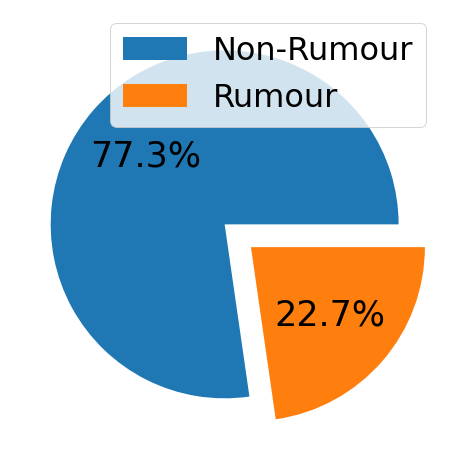

In [28]:
labels = ['Non-Rumour', 'Rumour']

tweet_covid['label'].value_counts().plot.pie(labels=['',''],
                                             explode=(0, 0.2),
                                             autopct='%1.1f%%', figsize=(8,8), fontsize=35, ylabel='')
# plt.title('Covid data', fontsize=44)
plt.legend(labels, fontsize=32 )
# plt.savefig("../plot/covid_proportion.png")
plt.show()

### Hashtag analysis

#### Get rumour and non-rumour hashtags

In [42]:
rumour_hashtags = []
nonrumour_hashtags = []

for i in range(len(tweet_covid)):
    if tweet_covid['label'][i] == 1:
        for word in tweet_covid['source_text'][i].split():
            if word.startswith('#'):
                # focus on english hashtags only
                index = 1
                for c in word[1:]:
                    if not re.match(r'[a-z0-9]', c):
                        word = word.replace(word[index:], '')
                    index += 1
                if(word != '#') and len(word) > 2:
                    rumour_hashtags.append(word)
    else:
        for word in tweet_covid['source_text'][i].split():
            if word.startswith('#'):
                index = 1
                for c in word[1:]:
                    if not re.match(r'[a-z0-9]', c):
                        word = word.replace(word[index:], '')
                    index += 1
                if word != '#' and len(word) > 2:
                    nonrumour_hashtags.append(word)

rumour_hashtags = Counter(rumour_hashtags)
nonrumour_hashtags = Counter(nonrumour_hashtags)

In [43]:
print("Number of rumour hashtags:", len(rumour_hashtags))
print("Number of rumour hashtags in total:", sum(rumour_hashtags.values()))

Number of rumour hashtags: 479
Number of rumour hashtags in total: 1099


In [44]:
print("Hashtag ratio in rumour hashtags:", sum(rumour_hashtags.values()) / tweet_covid['label'].value_counts()[1])

Hashtag ratio in rumour hashtags: 0.31864308495216004


In [45]:
print("Number of non-rumour hashtags:", len(nonrumour_hashtags))
print("Number of non-rumour hashtags in total:", sum(nonrumour_hashtags.values()))

Number of non-rumour hashtags: 2012
Number of non-rumour hashtags in total: 6210


In [46]:
print("Hashtag ratio in non-rumour hashtags:", sum(nonrumour_hashtags.values()) / tweet_covid['label'].value_counts()[0])

Hashtag ratio in non-rumour hashtags: 0.5294569016966494


##### Rumour Hashtags

In [47]:
rumour_hashtags.most_common(20)

[('#covid19', 284),
 ('#coronavirus', 168),
 ('#covid', 17),
 ('#china', 16),
 ('#txlege', 10),
 ('#coronaviruspandemic', 9),
 ('#breaking', 9),
 ('#lockdown', 8),
 ('#florida', 6),
 ('#maga', 5),
 ('#foxnews', 5),
 ('#blacklivesmatter', 5),
 ('#americafirst', 4),
 ('#trump', 4),
 ('#wearamask', 4),
 ('#iran', 4),
 ('#georgefloyd', 4),
 ('#covidiots', 4),
 ('#familiesfirst', 4),
 ('#stayathome', 4)]

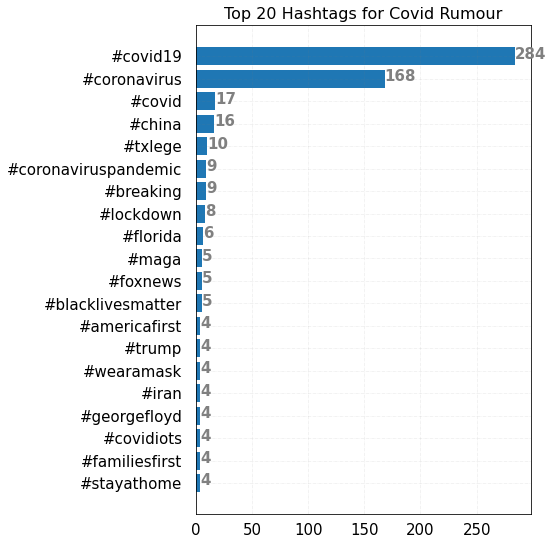

In [48]:
fig, ax = plt.subplots(figsize=(6, 9))

ax.barh([hashtag for hashtag, count in rumour_hashtags.most_common(20)],
        [count for hashtag, count in rumour_hashtags.most_common(20)])

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5, labelsize=15)
ax.yaxis.set_tick_params(pad=10, labelsize=15)
  
# Add x, y gridlines
ax.grid(visible=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=15, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Top 20 Hashtags for Covid Rumour', fontsize=16)

# plt.savefig("../plot/Top 20 Hashtags for Covid Rumour.png")
  
# Show Plot
plt.show()

##### Non-Rumour Hashtags

In [49]:
nonrumour_hashtags.most_common(20)

[('#covid19', 1906),
 ('#coronavirus', 888),
 ('#covid', 121),
 ('#breaking', 84),
 ('#stayhome', 41),
 ('#cdnpoli', 31),
 ('#china', 28),
 ('#coronaviruspandemic', 28),
 ('#stayhomesavelives', 26),
 ('#socialdistancing', 23),
 ('#lockdown', 22),
 ('#staysafe', 19),
 ('#covid19ph', 19),
 ('#stayalert', 19),
 ('#stayathome', 18),
 ('#indiafightscorona', 17),
 ('#sarscov2', 17),
 ('#trump', 15),
 ('#onpoli', 15),
 ('#hydroxychloroquine', 14)]

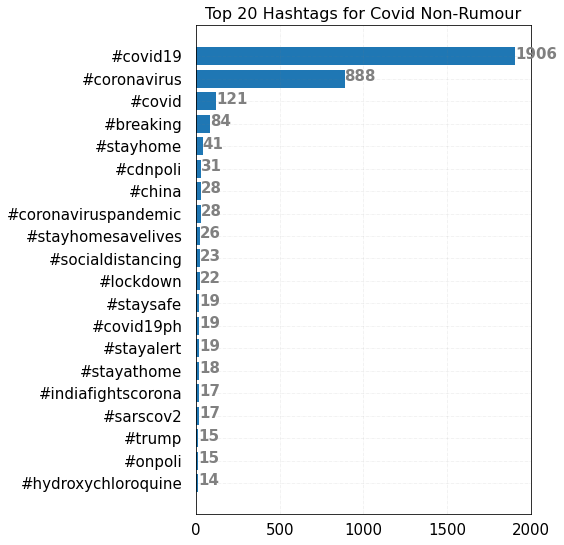

In [50]:
fig, ax = plt.subplots(figsize=(6, 9))

ax.barh([hashtag for hashtag, count in nonrumour_hashtags.most_common(20)],
        [count for hashtag, count in nonrumour_hashtags.most_common(20)])

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5, labelsize=15)
ax.yaxis.set_tick_params(pad=10, labelsize=15)
  
# Add x, y gridlines
ax.grid(visible=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=15, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Top 20 Hashtags for Covid Non-Rumour', fontsize=16)

# plt.savefig("../plot/Top 20 Hashtags for Covid Non-Rumour.png")
  
# Show Plot
plt.show()

#### Common hashtags 

In [51]:
# find common hashtags and sort by frequency

common_hashtags = list(set(rumour_hashtags.keys()) & set(nonrumour_hashtags.keys()))

common_hashtags.sort(key=lambda k: rumour_hashtags[k] + nonrumour_hashtags[k], reverse=True)

print("Number of common hashtags:", len(common_hashtags))

Number of common hashtags: 185


In [52]:
common_hashtags[:20]

['#covid19',
 '#coronavirus',
 '#covid',
 '#breaking',
 '#china',
 '#stayhome',
 '#coronaviruspandemic',
 '#cdnpoli',
 '#lockdown',
 '#socialdistancing',
 '#stayathome',
 '#staysafe',
 '#trump',
 '#indiafightscorona',
 '#txlege',
 '#blacklivesmatter',
 '#auspol',
 '#maga',
 '#covid2019',
 '#florida']

In [53]:
print("Hashtag overlap rate:",
      len(common_hashtags) /
      (len(rumour_hashtags) + len(nonrumour_hashtags) - len(common_hashtags)))

Hashtag overlap rate: 0.08022549869904597


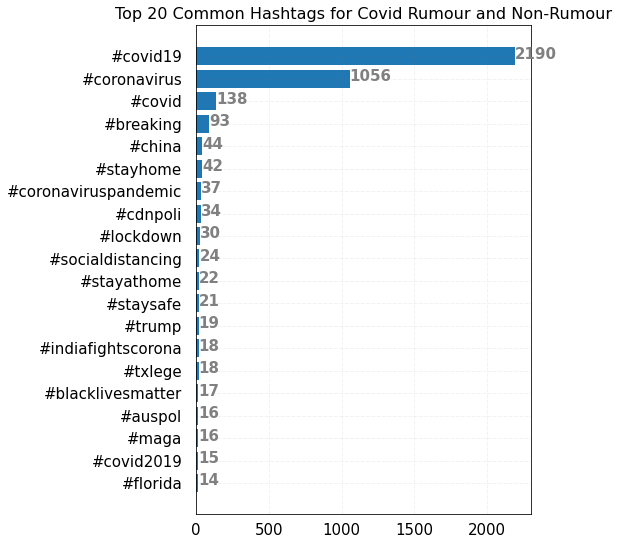

In [54]:
fig, ax = plt.subplots(figsize=(6, 9))

ax.barh(common_hashtags[:20], [
    rumour_hashtags[k] + nonrumour_hashtags[k] for k in common_hashtags[:20]
])

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5, labelsize=15)
ax.yaxis.set_tick_params(pad=10, labelsize=15)
  
# Add x, y gridlines
ax.grid(visible=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=15, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Top 20 Common Hashtags for Covid Rumour and Non-Rumour', fontsize=16)

# plt.savefig("../plot/Top 20 Common Hashtags.png")

# Show Plot
plt.show()

#### Unique hashtags

##### Unique Rumour Hashtags

In [65]:
# get rid of first 10 common keys

unique_rumour_hashtags = Counter({
    key: rumour_hashtags[key]
    for key in rumour_hashtags if key not in common_hashtags[:10]
})

In [66]:
unique_rumour_hashtags.most_common(20)

[('#txlege', 10),
 ('#florida', 6),
 ('#maga', 5),
 ('#foxnews', 5),
 ('#blacklivesmatter', 5),
 ('#americafirst', 4),
 ('#trump', 4),
 ('#wearamask', 4),
 ('#iran', 4),
 ('#georgefloyd', 4),
 ('#covidiots', 4),
 ('#familiesfirst', 4),
 ('#stayathome', 4),
 ('#thursdaythoughts', 3),
 ('#rentrelief', 3),
 ('#texas', 3),
 ('#9news', 3),
 ('#icantbreathe', 3),
 ('#youractionssavelives', 3),
 ('#ccpvirus', 3)]

In [57]:
print("Number of Unique Rumour Hashtags:", len(unique_rumour_hashtags.keys()))

Number of Unique Rumour Hashtags: 469


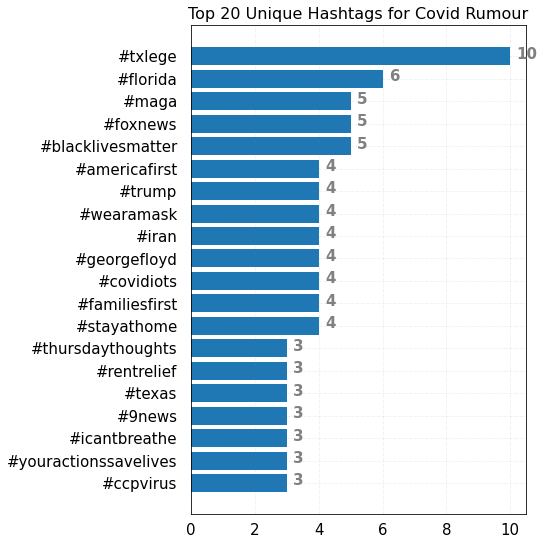

In [58]:
fig, ax = plt.subplots(figsize=(6, 9))

ax.barh([hashtag for hashtag, count in unique_rumour_hashtags.most_common(20)],
        [count for hashtag, count in unique_rumour_hashtags.most_common(20)])

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5, labelsize=15)
ax.yaxis.set_tick_params(pad=10, labelsize=15)
  
# Add x, y gridlines
ax.grid(visible=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=15, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Top 20 Unique Hashtags for Covid Rumour', fontsize=16)

# plt.savefig("../plot/Top 20 Unique Hashtags for Covid Rumour.png")
  
# Show Plot
plt.show()

##### Unique Non-Rumour Hashtags

In [59]:
unique_nonrumour_hashtags = Counter({
    key: nonrumour_hashtags[key]
    for key in nonrumour_hashtags if key not in common_hashtags[:10]
})

In [60]:
unique_nonrumour_hashtags.most_common(20)

[('#stayhomesavelives', 26),
 ('#staysafe', 19),
 ('#covid19ph', 19),
 ('#stayalert', 19),
 ('#stayathome', 18),
 ('#indiafightscorona', 17),
 ('#sarscov2', 17),
 ('#trump', 15),
 ('#onpoli', 15),
 ('#hydroxychloroquine', 14),
 ('#covid2019', 14),
 ('#auspol', 14),
 ('#india', 12),
 ('#takeresponsibility', 12),
 ('#blacklivesmatter', 12),
 ('#watch', 11),
 ('#nhs', 11),
 ('#ridge', 11),
 ('#maga', 11),
 ('#ppe', 11)]

In [61]:
print("Number of Unique Non-rumour Hashtags:", len(unique_nonrumour_hashtags.keys()))

Number of Unique Non-rumour Hashtags: 2002


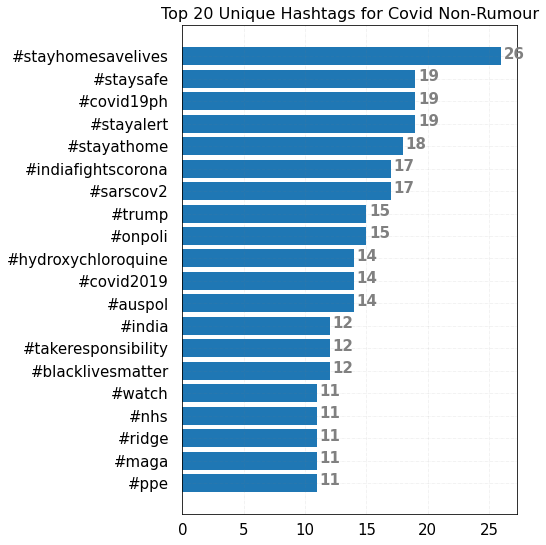

In [62]:
fig, ax = plt.subplots(figsize=(6, 9))

ax.barh([hashtag for hashtag, count in unique_nonrumour_hashtags.most_common(20)],
        [count for hashtag, count in unique_nonrumour_hashtags.most_common(20)])

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
  
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5, labelsize=15)
ax.yaxis.set_tick_params(pad=10, labelsize=15)
  
# Add x, y gridlines
ax.grid(visible=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)
  
# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=15, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Top 20 Unique Hashtags for Covid Non-Rumour', fontsize=16)

# plt.savefig("../plot/Top 20 Unique Hashtags for Covid Non-Rumour.png")
  
# Show Plot
plt.show()